In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./data_text_processed_ngram_2_7.csv')

In [4]:
df.head()

,blurb,country,goal,name,state,main_category,sub_category,location_type,duration,deadline_month,...,short film young,short horror film,soft enamel pins,support largest creative,support largest creative collaboration,support largest creative collaboration history,support largest creative collaboration history 50 state,trying raise money,www youtube com,year old girl
0,A colorful Dia de los Muertos themed oracle de...,US,1000.0,The Ofrenda Oracle Deck,successful,games,playing cards,Town,30,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Electra's long awaited, eclectic Debut Pop/Roc...",US,15000.0,"Record Electra's Debut Album (Pop, Rock, Class...",successful,music,rock,Suburb,30,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,The Mist of Tribunal is a turn-based card game...,GB,10000.0,The Mist of Tribunal - A Card Game,failed,games,playing cards,Town,59,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"Livng with a brain impairment, what its like t...",US,2800.0,Help change the face of Brain Impairment,successful,publishing,nonfiction,Town,30,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Annapolis Chamber Players is a non-for profit ...,US,3500.0,Annapolis Chamber Music Project,successful,music,classical music,Town,30,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.drop(['blurb', 'name', 'deadline_month', 'deadline_day', 'baseline'], axis=1, inplace=True)

In [13]:
df.iloc[:,:10]

,country,goal,state,main_category,sub_category,location_type,duration,launched_at_month,launched_at_day,target
0,US,1000.0,successful,games,playing cards,Town,30,8,10,1
1,US,15000.0,successful,music,rock,Suburb,30,5,13,1
2,GB,10000.0,failed,games,playing cards,Town,59,1,12,0
3,US,2800.0,successful,publishing,nonfiction,Town,30,12,10,1
4,US,3500.0,successful,music,classical music,Town,30,4,2,1
...,...,...,...,...,...,...,...,...,...,...
177517,US,3883.0,successful,music,electronic music,Town,58,8,4,1
177518,NL,5000.0,successful,music,electronic music,Town,36,5,14,1
177519,US,2500.0,successful,technology,hardware,Town,33,8,14,1
177520,US,5500.0,successful,film & video,festivals,Suburb,30,3,21,1


In [53]:
df_misclassified = pd.read_csv('misclassified.csv')

In [63]:
df_test = pd.read_csv('test_data.csv')

In [54]:
df_misclassified.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9946 entries, 0 to 9945
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            9946 non-null   object 
 1   goal               9946 non-null   float64
 2   main_category      9946 non-null   object 
 3   sub_category       9946 non-null   object 
 4   location_type      9946 non-null   object 
 5   duration           9946 non-null   float64
 6   deadline_month     9946 non-null   int64  
 7   deadline_day       9946 non-null   int64  
 8   launched_at_month  9946 non-null   int64  
 9   launched_at_day    9946 non-null   int64  
 10  baseline           9946 non-null   int64  
 11  target             9946 non-null   int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 932.6+ KB


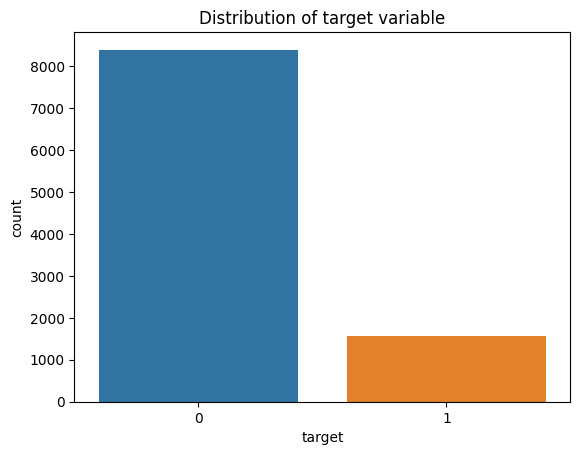

In [55]:
# check distribution for target variable

df_misclassified['target'].value_counts()

# plot distribution for target variable

sns.countplot(x='target', data=df_misclassified)
plt.title('Distribution of target variable')
plt.show()


In [85]:
df_misclassified.groupby('target')['goal'].median()

target
0    8.29405
1    9.10498
Name: goal, dtype: float64

In [57]:
df_misclassified.groupby('target')['duration'].median()

target
0    30.0
1    30.0
Name: duration, dtype: float64

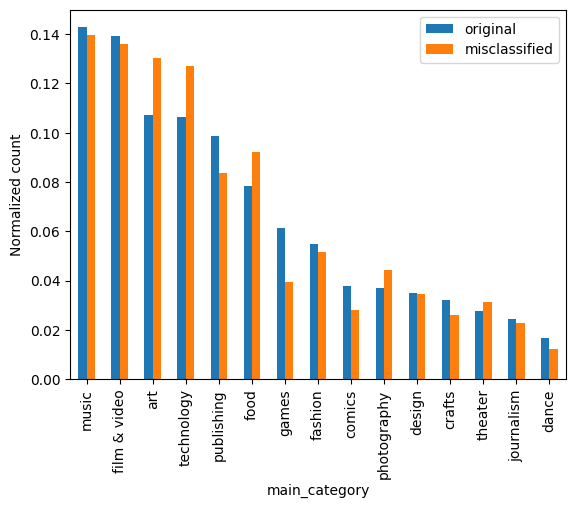

In [83]:
def bar_compare(col,amount=10):
    orinal = df_test[col].value_counts(normalize=True)
    misclassified = df_misclassified[col].value_counts(normalize=True)

    merged = pd.concat([orinal, misclassified], axis=1)
    merged.columns = ['original', 'misclassified']
    merged.plot(kind='bar')
    # plot labels
    plt.xlabel(col)
    plt.ylabel('Normalized count')

bar_compare('main_category')


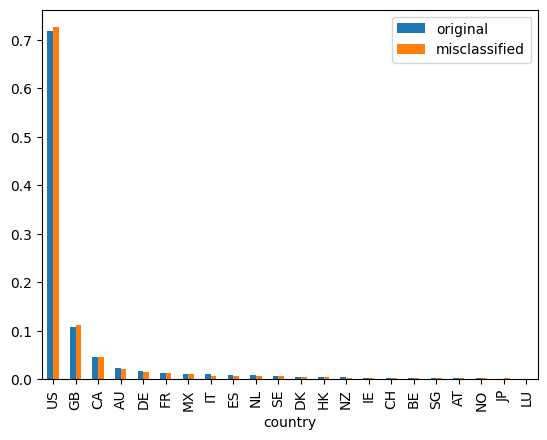

In [72]:
bar_compare('country')

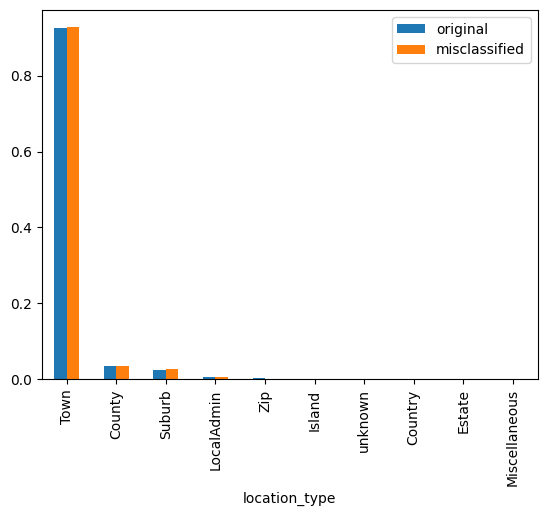

In [73]:
bar_compare('location_type')

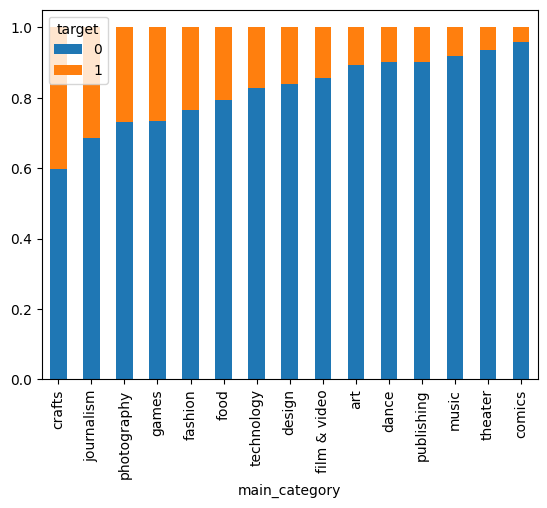

In [60]:
def stack_bar_class(col,amount):
    main_cat = pd.crosstab(df_misclassified[col],df_misclassified['target'],normalize='index').head(amount).sort_values(by=1,ascending=False)
# plot stacked bar chart
    main_cat.plot.bar(stacked=True)
    plt.legend(title='target')
    plt.show()

stack_bar_class('main_category', 20)